# Doubt Solving & Tutorial: DMP 01

#### Author & Instructor: Ashutosh Dave, FRM

### Today's Agenda
- Doubt solving for DMP 01
- Libraries and fetching data
- Steps in Vectorized Backtesting of a Typical Strategy
- Vectorized Backtesting vs Event Driven Backtesting(using for-loops)
- Simple returns vs Log returns: which one to use?
- Comparing different Moving Averages (Simple, Exponential etc.)
- Importing data for multiple tickers

### About today's session
- Priority to doubts concerning material covered in DMP 01
- Understanding buidling blocks of basic vectorized backtesting

### Working directory

In [1]:
import os
os.getcwd()

'C:\\Users\\Ashutosh\\Desktop\\self EPAT\\DMP 01 Doubt Solving Session'

In [ ]:
#os.chdir('C:\\Users\\Ashutosh\\Desktop\\DMP 01')

<br>

### Libraries & Data Fetching

In [2]:
# This is to ignore the warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing required libraries
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt
import pyfolio

In [4]:
# To display multiple outputs from the same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
!pip install yfinance

In [ ]:
# Installing libraries from Jupyter notebook
# !pip install yfinance
#! pip install datetime

In [5]:
# Create start and end dates 

start1 = dt.date(2017, 1, 1) 
end1 = dt.date(2020, 11, 30) 

In [6]:
start1
end1

datetime.date(2017, 1, 1)

datetime.date(2020, 11, 30)

In [7]:
# Using the yfinance library

ticker= ['^NSEI'] # the scrip for which we want the data

df = yf.download(ticker, start=start1, end=end1)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,8210.099609,8212.000000,8133.799805,8179.500000,8179.500000,118300
2017-01-03,8196.049805,8219.099609,8148.600098,8192.250000,8192.250000,127300
2017-01-04,8202.650391,8218.500000,8180.899902,8190.500000,8190.500000,132400
2017-01-05,8226.650391,8282.650391,8223.700195,8273.799805,8273.799805,159100
2017-01-06,8281.849609,8306.849609,8233.250000,8243.799805,8243.799805,139400
...,...,...,...,...,...,...
2020-11-23,12960.299805,12968.849609,12825.700195,12926.450195,12926.450195,633100
2020-11-24,13002.599609,13079.099609,12978.000000,13055.150391,13055.150391,571900
2020-11-25,13130.000000,13145.849609,12833.650391,12858.400391,12858.400391,679000


In [8]:
df.shape

(962, 6)

In [ ]:
df.head(6)

Note: If downloading intraday data from Yahoo, the requested range must be within the last 60 days.

In [ ]:
# Alternate way 
df = pd.read_csv("NAME_OF_THE FILE.csv", index_col=0, parse_dates=True)
print(type(df))

<br>

## Steps in Vectorized Backtesting of a Typical Strategy

- Strategy/Idea
- Data
- Indicators
- Signals
- Positions
- Returns
- Analysis

#### Example Strategy/Idea: **The Moving Average Crossover Strategy (Long-short)**
We have two SMA filters viz. the shorter lookback period SMA (henceforth referred to as 'SMA_fast') and the longer lookback period SMA (henceforth referred to as 'SMA_slow'). We go long at the first instance when the SMA_fast exceeds the SMA_slow. Similarly, we go short at the first instance when the SMA_slow  exceeds the SMA_fast.

Our trading rules can be stated as:<br>
- Go long when sma_fast > sma_slow  on a given day and sma_fast < sma_slow on the previous day <br>
- Go short when sma_fast < sma_slow  on a given day and sma_fast > sma_slow  on the previous day

Note: Basic assumption is that We trade/take positions at the Close of the trading day.

#### Data: 

In [9]:
df3 =df.copy()
df3

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,8210.099609,8212.000000,8133.799805,8179.500000,8179.500000,118300
2017-01-03,8196.049805,8219.099609,8148.600098,8192.250000,8192.250000,127300
2017-01-04,8202.650391,8218.500000,8180.899902,8190.500000,8190.500000,132400
2017-01-05,8226.650391,8282.650391,8223.700195,8273.799805,8273.799805,159100
2017-01-06,8281.849609,8306.849609,8233.250000,8243.799805,8243.799805,139400
...,...,...,...,...,...,...
2020-11-23,12960.299805,12968.849609,12825.700195,12926.450195,12926.450195,633100
2020-11-24,13002.599609,13079.099609,12978.000000,13055.150391,13055.150391,571900
2020-11-25,13130.000000,13145.849609,12833.650391,12858.400391,12858.400391,679000


#### Indicators:

In [10]:
m = 9 # defining the shorter lookback period
n = 90 # defining the longer lookback period

df3['sma_fast'] = df3['Adj Close'].rolling(window=m).mean()
df3['sma_slow'] = df3['Adj Close'].rolling(window=n).mean()

#df3[['Adj Close', 'sma_fast', 'sma_slow']].plot(grid=True, linewidth=0.5, figsize=(12, 8))

df3['sma_fast_prev_day'] = df3['sma_fast'].shift(1)
df3['sma_slow_prev_day'] = df3['sma_slow'].shift(1)

In [11]:
df3

,Open,High,Low,Close,Adj Close,Volume,sma_fast,sma_slow,sma_fast_prev_day,sma_slow_prev_day
Date,,,,,,,,,,
2017-01-02,8210.099609,8212.000000,8133.799805,8179.500000,8179.500000,118300,NaN,NaN,NaN,NaN
2017-01-03,8196.049805,8219.099609,8148.600098,8192.250000,8192.250000,127300,NaN,NaN,NaN,NaN
2017-01-04,8202.650391,8218.500000,8180.899902,8190.500000,8190.500000,132400,NaN,NaN,NaN,NaN
2017-01-05,8226.650391,8282.650391,8223.700195,8273.799805,8273.799805,159100,NaN,NaN,NaN,NaN
2017-01-06,8281.849609,8306.849609,8233.250000,8243.799805,8243.799805,139400,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2020-11-23,12960.299805,12968.849609,12825.700195,12926.450195,12926.450195,633100,12795.627821,11605.745540,12743.916667,11581.451096
2020-11-24,13002.599609,13079.099609,12978.000000,13055.150391,13055.150391,571900,12842.744575,11629.672765,12795.627821,11605.745540
2020-11-25,13130.000000,13145.849609,12833.650391,12858.400391,12858.400391,679000,12854.883464,11650.074989,12842.744575,11629.672765


In [ ]:
df4 = df3.dropna()

In [12]:
# Getting rid of rows with NaN values
df3.dropna(inplace=True)

In [15]:
df3.dropna?

In [13]:
df3

,Open,High,Low,Close,Adj Close,Volume,sma_fast,sma_slow,sma_fast_prev_day,sma_slow_prev_day
Date,,,,,,,,,,
2017-05-16,9461.000000,9517.200195,9456.349609,9512.250000,9512.250000,166500,9384.927843,8926.354427,9362.672309,8911.546094
2017-05-17,9517.599609,9532.599609,9486.099609,9525.750000,9525.750000,205500,9403.355577,8941.171094,9384.927843,8926.354427
2017-05-18,9453.200195,9489.099609,9418.099609,9429.450195,9429.450195,193300,9419.372287,8954.937207,9403.355577,8941.171094
2017-05-19,9469.900391,9505.750000,9390.750000,9427.900391,9427.900391,252100,9432.022352,8967.760547,9419.372287,8954.937207
2017-05-22,9480.250000,9498.650391,9427.900391,9438.250000,9438.250000,196800,9445.511285,8981.032216,9432.022352,8967.760547
...,...,...,...,...,...,...,...,...,...,...
2020-11-23,12960.299805,12968.849609,12825.700195,12926.450195,12926.450195,633100,12795.627821,11605.745540,12743.916667,11581.451096
2020-11-24,13002.599609,13079.099609,12978.000000,13055.150391,13055.150391,571900,12842.744575,11629.672765,12795.627821,11605.745540
2020-11-25,13130.000000,13145.849609,12833.650391,12858.400391,12858.400391,679000,12854.883464,11650.074989,12842.744575,11629.672765


In [14]:
df3.shape

(872, 10)

#### Signals:

In [16]:
df3['sma_fast']

Date
2017-05-16     9384.927843
2017-05-17     9403.355577
2017-05-18     9419.372287
2017-05-19     9432.022352
2017-05-22     9445.511285
                  ...     
2020-11-23    12795.627821
2020-11-24    12842.744575
2020-11-25    12854.883464
2020-11-26    12887.794596
2020-11-27    12915.461263
Name: sma_fast, Length: 872, dtype: float64

In [17]:
# Signals based on crossover logic
df3['signal'] = np.where((df3['sma_fast'] > df3['sma_slow']) 
                        & (df3['sma_fast_prev_day'] < df3['sma_slow_prev_day']), 1, 0)
df3['signal'] = np.where((df3['sma_fast'] < df3['sma_slow']) 
                        & (df3['sma_fast_prev_day'] > df3['sma_slow_prev_day']), -1, df3['signal'])

In [21]:
pd.set_option(max)

ValueError: Must provide an even number of non-keyword arguments

In [20]:
df3

,Open,High,Low,Close,Adj Close,Volume,sma_fast,sma_slow,sma_fast_prev_day,sma_slow_prev_day,signal
Date,,,,,,,,,,,
2017-05-16,9461.000000,9517.200195,9456.349609,9512.250000,9512.250000,166500,9384.927843,8926.354427,9362.672309,8911.546094,0
2017-05-17,9517.599609,9532.599609,9486.099609,9525.750000,9525.750000,205500,9403.355577,8941.171094,9384.927843,8926.354427,0
2017-05-18,9453.200195,9489.099609,9418.099609,9429.450195,9429.450195,193300,9419.372287,8954.937207,9403.355577,8941.171094,0
2017-05-19,9469.900391,9505.750000,9390.750000,9427.900391,9427.900391,252100,9432.022352,8967.760547,9419.372287,8954.937207,0
2017-05-22,9480.250000,9498.650391,9427.900391,9438.250000,9438.250000,196800,9445.511285,8981.032216,9432.022352,8967.760547,0
...,...,...,...,...,...,...,...,...,...,...,...
2020-11-23,12960.299805,12968.849609,12825.700195,12926.450195,12926.450195,633100,12795.627821,11605.745540,12743.916667,11581.451096,0
2020-11-24,13002.599609,13079.099609,12978.000000,13055.150391,13055.150391,571900,12842.744575,11629.672765,12795.627821,11605.745540,0
2020-11-25,13130.000000,13145.849609,12833.650391,12858.400391,12858.400391,679000,12854.883464,11650.074989,12842.744575,11629.672765,0


In [19]:
df3['signal'].value_counts()

 0    862
 1      5
-1      5
Name: signal, dtype: int64

#### Positions:

In [22]:
df3['position'] = df3['signal'].replace(to_replace=0, method='ffill')

In [23]:
df3['position'].value_counts()

 1    448
-1    231
 0    193
Name: position, dtype: int64

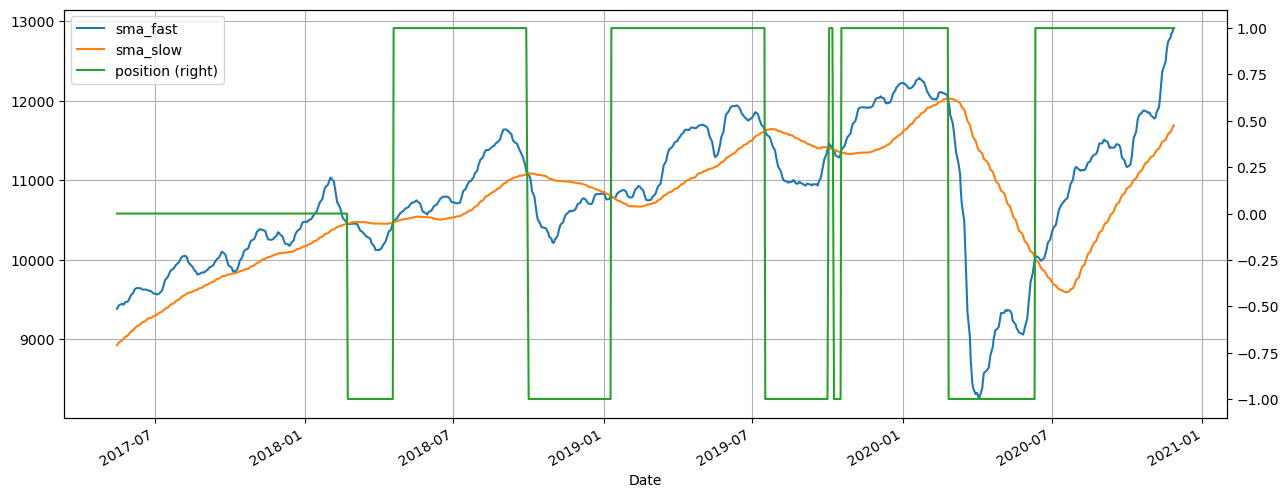

In [24]:
# To check if the strategy is working as planned:
df3[['sma_fast','sma_slow', 'position']].plot(figsize=(15, 6), secondary_y='position', grid=True)
plt.show();

In [25]:
df3

,Open,High,Low,Close,Adj Close,Volume,sma_fast,sma_slow,sma_fast_prev_day,sma_slow_prev_day,signal,position
Date,,,,,,,,,,,,
2017-05-16,9461.000000,9517.200195,9456.349609,9512.250000,9512.250000,166500,9384.927843,8926.354427,9362.672309,8911.546094,0,0
2017-05-17,9517.599609,9532.599609,9486.099609,9525.750000,9525.750000,205500,9403.355577,8941.171094,9384.927843,8926.354427,0,0
2017-05-18,9453.200195,9489.099609,9418.099609,9429.450195,9429.450195,193300,9419.372287,8954.937207,9403.355577,8941.171094,0,0
2017-05-19,9469.900391,9505.750000,9390.750000,9427.900391,9427.900391,252100,9432.022352,8967.760547,9419.372287,8954.937207,0,0
2017-05-22,9480.250000,9498.650391,9427.900391,9438.250000,9438.250000,196800,9445.511285,8981.032216,9432.022352,8967.760547,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-23,12960.299805,12968.849609,12825.700195,12926.450195,12926.450195,633100,12795.627821,11605.745540,12743.916667,11581.451096,0,1
2020-11-24,13002.599609,13079.099609,12978.000000,13055.150391,13055.150391,571900,12842.744575,11629.672765,12795.627821,11605.745540,0,1
2020-11-25,13130.000000,13145.849609,12833.650391,12858.400391,12858.400391,679000,12854.883464,11650.074989,12842.744575,11629.672765,0,1


#### Periodic Returns:

In [26]:
# 'Buy and hold' i.e. passive unrealized daily returns
df3['bnh_returns'] = df3['Adj Close'].pct_change()

# Strategy returns(unrealized) series
df3['strategy_returns'] = df3['bnh_returns'] * df3['position'].shift(1)

In [27]:
# Equity calculations
df3['bnh_equity'] = np.cumprod(1+df3['bnh_returns'])
df3['strategy_equity'] = np.cumprod(1+df3['strategy_returns'])

In [28]:
# Total return for the backtesting period can be extracted from the last equity value
print('Total return for buy and hold:', df3['bnh_equity'][-1]-1)
print('Total return for our strategy:', df3['strategy_equity'][-1]-1)

Total return for buy and hold: 0.36339459069226265
Total return for our strategy: 0.5815745774463652


In [29]:
# Better presentation
print('Total return for our strategy:', np.round(100*(df3['strategy_equity'][-1]-1),2),'%')

Total return for our strategy: 58.16 %


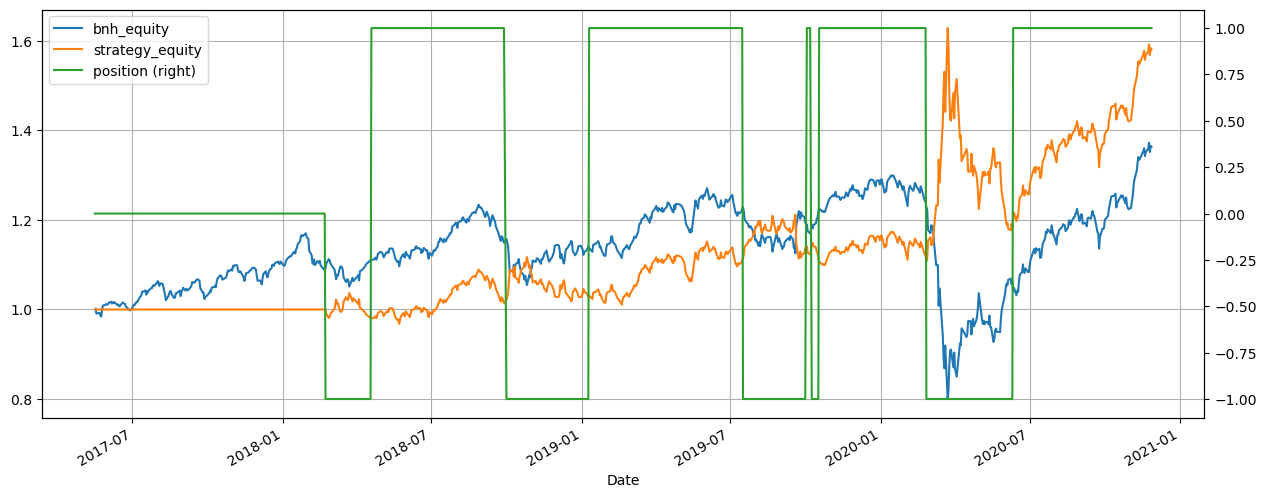

In [30]:
# To check the equity curves:
df3[['bnh_equity','strategy_equity', 'position']].plot(figsize=(15, 6), secondary_y='position', grid=True)
plt.show();

#### Further Analysis:

In [31]:
import pyfolio as pf
pf.create_simple_tear_sheet(df3['strategy_returns'])

Start date,2017-05-16
End date,2020-11-27
Total months,41
,Backtest
Annual return,14.2%
Cumulative returns,58.2%
Annual volatility,19.2%
Sharpe ratio,0.79
Calmar ratio,0.51
Stability,0.79
Max drawdown,-27.7%


In [43]:
#Tradewise analysis
a= df3[['Adj Close','signal','strategy_equity']].loc[(df3['signal']==1)|(df3['signal']==-1)]
a

,Adj Close,signal,strategy_equity
Date,,,
2018-02-22,10382.700195,-1,1.000000
2018-04-19,10565.299805,1,0.980297
2018-10-01,11008.299805,-1,1.021400
2019-01-10,10821.599609,1,1.031260
2019-07-17,11687.500000,-1,1.113777
2019-10-03,11314.000000,1,1.141423
2019-10-09,11313.299805,-1,1.141352
2019-10-18,11661.849609,1,1.106881
2020-02-26,11678.500000,-1,1.108462


In [45]:
# Append the last trading day to close
b= df3.iloc[-1:][['Adj Close','signal','strategy_equity']]
a.append(b)

,Adj Close,signal,strategy_equity
Date,,,
2018-02-22,10382.700195,-1,1.000000
2018-04-19,10565.299805,1,0.980297
2018-10-01,11008.299805,-1,1.021400
2019-01-10,10821.599609,1,1.031260
2019-07-17,11687.500000,-1,1.113777
2019-10-03,11314.000000,1,1.141423
2019-10-09,11313.299805,-1,1.141352
2019-10-18,11661.849609,1,1.106881
2020-02-26,11678.500000,-1,1.108462


<br>

## Vectorized Backtesting vs Event Driven Backtesting(using for-loops)
#### (This is just FYI, there is a separate lecture dedicated to event driven backtesting)

Why use for-loops?
- Vectorization is not always possible, especially for complex strategies with many conditions 
- Closer to 'Point in time' analysis, i.e. helps to avoid look ahead bias and hence more realistic

In [32]:
# fetching data
DF = df.copy()

# creating Indicators/MAs
m = 9
n = 90

DF['sma_fast'] = DF['Adj Close'].rolling(window=m).mean()
DF['sma_slow'] = DF['Adj Close'].rolling(window=n).mean()

DF['sma_fast_prev_day'] = DF['sma_fast'].shift(1)
DF['sma_slow_prev_day'] = DF['sma_slow'].shift(1)

# Getting rid of rows with NaN values
DF.dropna(inplace=True)
DF.shape

(872, 10)

In [33]:
# Creating empty lists to hold values of trading price and position
trade_price = []
position=[]
date = []

In [34]:
# generating trade_price info and position using a for-loop
# iterating through every row

for i in range(len(DF)):
   
    if (DF['sma_fast'].iloc[i] > DF['sma_slow'].iloc[i]) and \
    (DF['sma_fast_prev_day'].iloc[i] < DF['sma_slow_prev_day'].iloc[i]):
        trade_price.append(DF['Adj Close'].iloc[i])
        position.append(1)
        date.append(DF.index[i].date())
        
    
    
    elif (DF['sma_fast'].iloc[i] < DF['sma_slow'].iloc[i]) and \
    (DF['sma_fast_prev_day'].iloc[i] > DF['sma_slow_prev_day'].iloc[i]):
        trade_price.append(DF['Adj Close'].iloc[i])
        position.append(-1)
        date.append(DF.index[i].date())

In [35]:
trade_price

[10382.7001953125,
 10565.2998046875,
 11008.2998046875,
 10821.599609375,
 11687.5,
 11314.0,
 11313.2998046875,
 11661.849609375,
 11678.5,
 9902.0]

In [36]:
position

[-1, 1, -1, 1, -1, 1, -1, 1, -1, 1]

In [37]:
date

[datetime.date(2018, 2, 22),
 datetime.date(2018, 4, 19),
 datetime.date(2018, 10, 1),
 datetime.date(2019, 1, 10),
 datetime.date(2019, 7, 17),
 datetime.date(2019, 10, 3),
 datetime.date(2019, 10, 9),
 datetime.date(2019, 10, 18),
 datetime.date(2020, 2, 26),
 datetime.date(2020, 6, 11)]

In [38]:
# Creating a new df to hold results
new_df = pd.DataFrame ({'date':date,'trade_price':trade_price, 'position':position})
new_df

,date,trade_price,position
0,2018-02-22,10382.700195,-1
1,2018-04-19,10565.299805,1
2,2018-10-01,11008.299805,-1
3,2019-01-10,10821.599609,1
4,2019-07-17,11687.500000,-1
5,2019-10-03,11314.000000,1
6,2019-10-09,11313.299805,-1
7,2019-10-18,11661.849609,1
8,2020-02-26,11678.500000,-1
9,2020-06-11,9902.000000,1


In [39]:
# extend/close the last open trade till the last date of backtesting period
closing_trade = {'date':DF.index[-1].date(),'trade_price':float(DF['Adj Close'][-1:]), 'position':0}
new_df = new_df.append(closing_trade, ignore_index=True)

In [40]:
new_df

,date,trade_price,position
0,2018-02-22,10382.700195,-1
1,2018-04-19,10565.299805,1
2,2018-10-01,11008.299805,-1
3,2019-01-10,10821.599609,1
4,2019-07-17,11687.500000,-1
5,2019-10-03,11314.000000,1
6,2019-10-09,11313.299805,-1
7,2019-10-18,11661.849609,1
8,2020-02-26,11678.500000,-1
9,2020-06-11,9902.000000,1


<br>

## Simple returns vs Log returns: which to use?

In [46]:
df1a = df.copy()

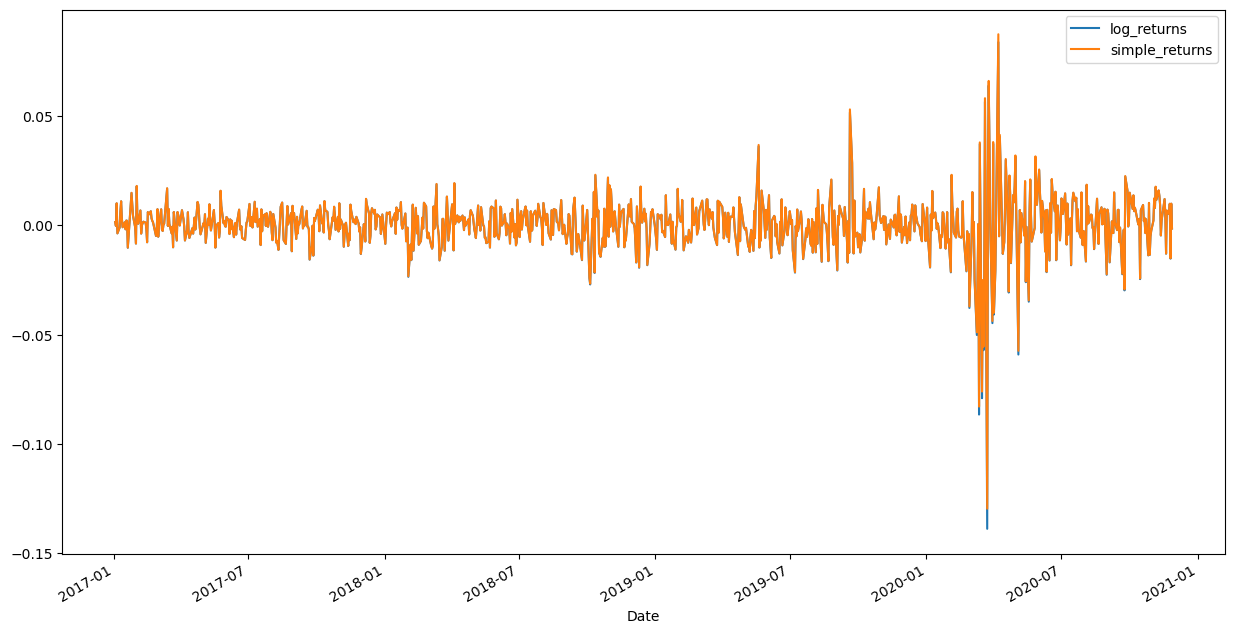

In [60]:
df1a['log_returns'] = np.log(df1a['Adj Close']/ df1a['Adj Close'].shift())

df1a['simple_returns'] = df1a['Adj Close'].pct_change()

df1a[['log_returns','simple_returns']].plot(figsize=(15,8))
plt.show();

why do we use log returns a lot in finance:
- They are a very good approximation for simple returns when the magnitude of returns is small
- They are easier to work with due to their property of additivity: the total return between time period t and t+n is simply the sum of all the returns from t to t+n
- Can use either, but be consistent when comparing performance of two or more strategies

For other pros and cons: https://quantivity.wordpress.com/2011/02/21/why-log-returns/

Simple returns have been used in class exercise 3 and the MACD strategy

In [48]:
# Buy and hold daily log returns
df3['bnh_returns'] = np.log(df3['Adj Close'] / df3['Adj Close'].shift(1))

# Strategy log returns 
df3['strategy_returns'] = df3['bnh_returns'] * df3['position'].shift(1)

In [ ]:
df3.tail()

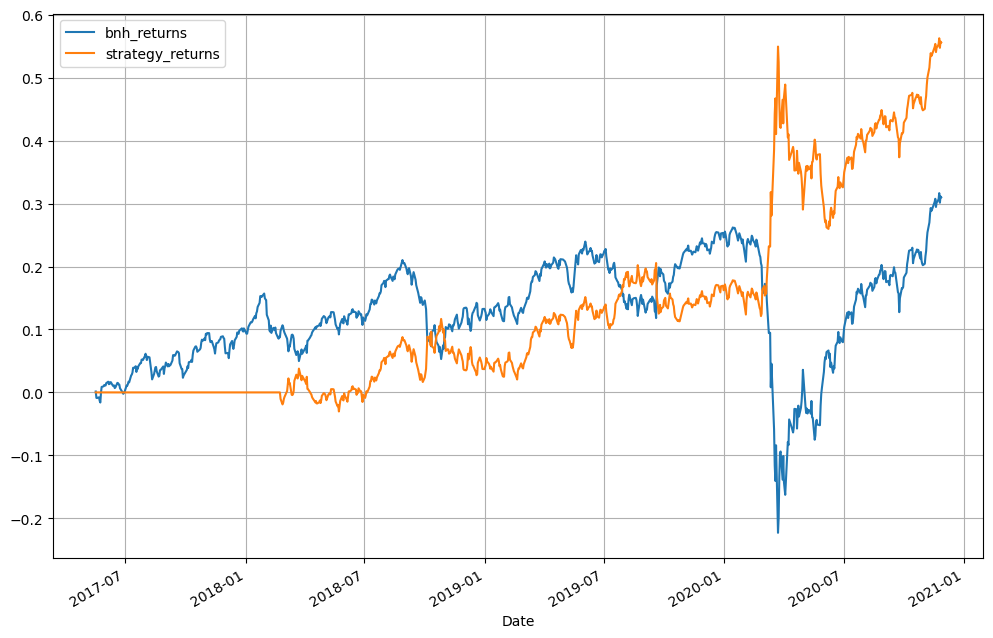

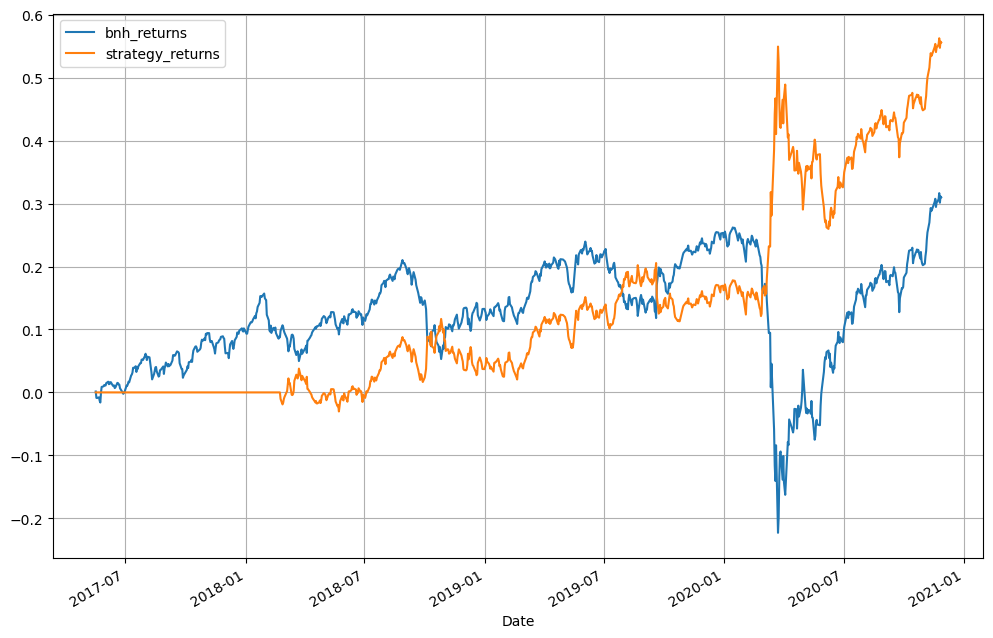

In [50]:
df3[['bnh_returns', 'strategy_returns']].cumsum().plot(grid=True, figsize=(12, 8))
plt.show();

In [ ]:
print('Buy and hold returns: ', np.round(df3['bnh_returns'].cumsum()[-1], 3))
print('Strategy returns: ', np.round(df3['strategy_returns'].cumsum()[-1], 3))

<br>

## Comapring different MAs

In [53]:
df1b= df[['Adj Close']].iloc[-100:,:].copy()

In [54]:
fast = 20
slow = 90

# 20 SMA
df1b['sma_fast'] = DF['Adj Close'].rolling(window=fast).mean()

# 20 EMA
df1b['ema_fast'] = df1b['Adj Close'].ewm(span=fast).mean()

# 90 SMA
df1b['sma_slow'] = DF['Adj Close'].rolling(window=slow).mean()
df1b.dropna(inplace=True)

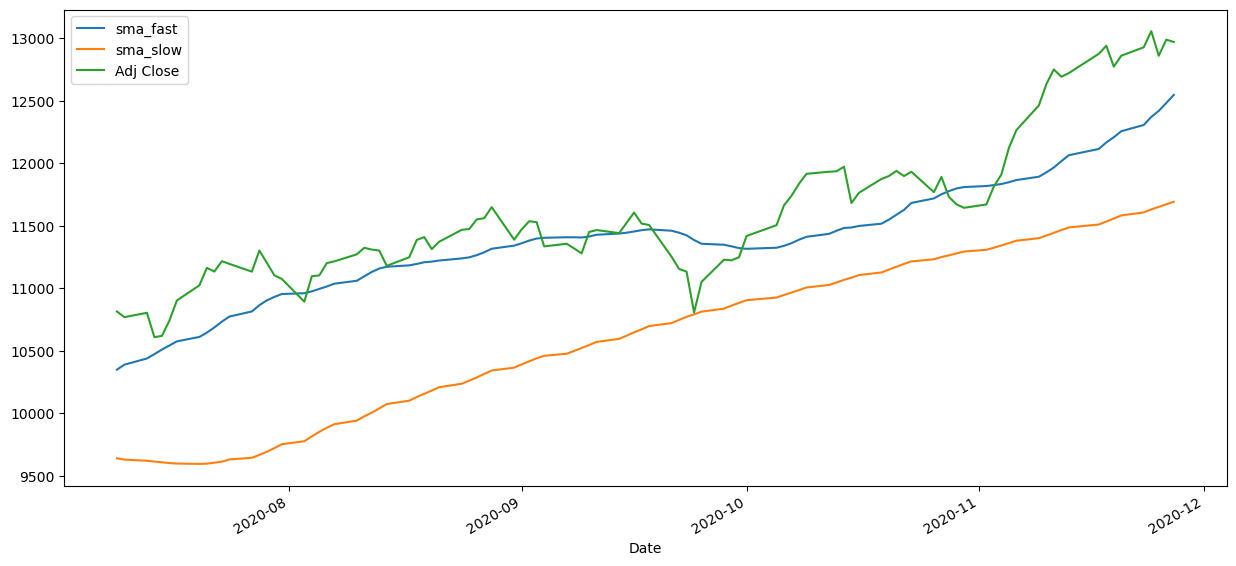

In [55]:
# fast SMA vs slow SMA
df1b[['sma_fast','sma_slow','Adj Close']].plot(figsize=(15,7))
plt.show();

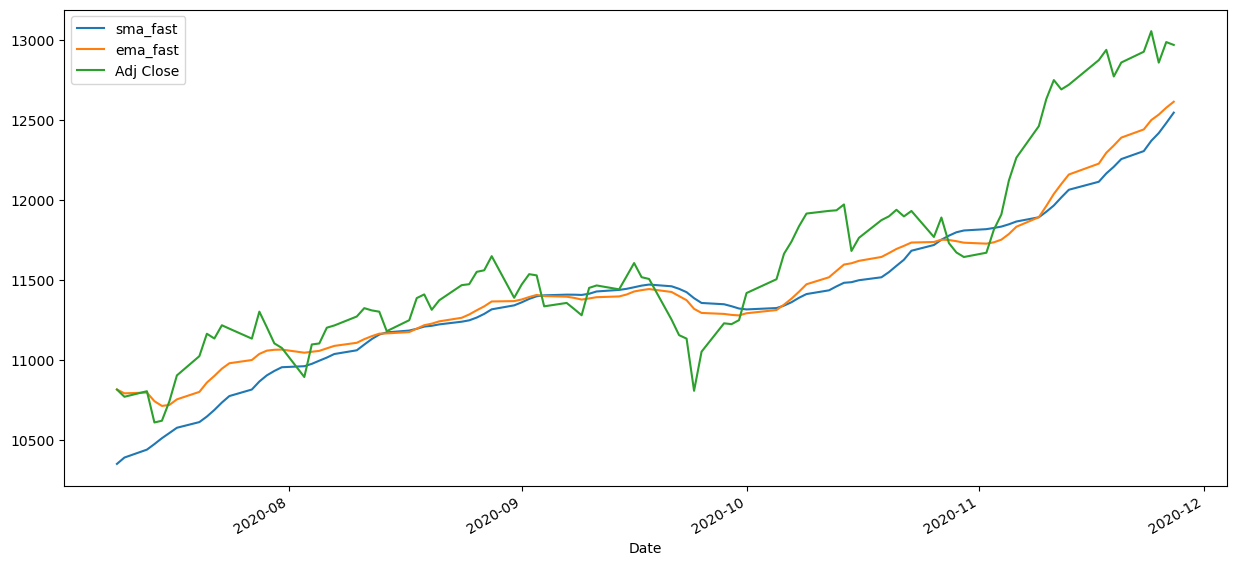

In [56]:
# 20 EMA vs 20 SMA
df1b[['sma_fast','ema_fast','Adj Close']].plot(figsize=(15,7))
plt.show();

We can see that:
- fast SMA tracks the price more compared to a slow SMA
- EMA tracks the price more compared to SMA as it gives higher weightage to more recent observations

Note that in pandas, the ewm function to create EMA can take a variety of parameters depending on how you want to weight the previous observations. 
<br>More info: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html

In [57]:
start1
end1

datetime.date(2017, 1, 1)

datetime.date(2020, 11, 30)

### Downloading data for multiple tickers using yfinance

In [58]:
tickers=['MSFT', 'AAPL','TSLA','GOOG']

DF =pd.DataFrame()

for i in tickers:
    df = yf.download(i,start1,end1)[['Adj Close']]
    df.columns = [i]                         
    DF = pd.concat([DF,df],axis =1)

df = DF.copy().round(5)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [59]:
df

,MSFT,AAPL,TSLA,GOOG
Date,,,,
2017-01-03,58.29197,27.37236,43.39800,786.14001
2017-01-04,58.03115,27.34172,45.39800,786.90002
2017-01-05,58.03115,27.48077,45.35000,794.02002
2017-01-06,58.53416,27.78713,45.80200,806.15002
2017-01-09,58.34785,28.04165,46.25600,806.65002
...,...,...,...,...
2020-11-20,209.02281,116.79126,489.60999,1742.18994
2020-11-23,208.74463,113.31758,521.84998,1734.85999
2020-11-24,212.47028,114.63141,555.38000,1768.88000


In [ ]:
df.to_csv('DATA.csv')

<br>

<br>

<br>

<br>

<br>

<br>

<br>